In [94]:
%matplotlib inline

#imports
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.svm import SVR

In [95]:
# Import Pitcher's Data


# exp_data = pd.read_excel(r'C:\Users\huynh\Documents\test1-sus.xlsx')
# bucket = exp_data['Bucket']
# result = exp_data['Result']


3.2
# Load the training data
# For Visualization:
train_dataV = pd.read_excel(r'C:\Users\huynh\Downloads\Pitchers Training Set.xlsx',
                          sep=r'\s*,\s*')

# For Regression Calculation:
train_data = pd.read_excel(r'C:\Users\huynh\Downloads\Pitchers Training Set.xlsx',
                          converters={'Name':str, 'ERA':np.double, 
                                      'Experience ':np.double, 'WAR':np.double, 'Salary':np.double})
#print(train_data)

# Load the test data
test_data = pd.read_excel(r'C:\Users\huynh\Downloads\Pitchers Test Set.xlsx',
                           sep=r'\s*,\s*')
#print(test_data)

# Filter out features (train)
ERA_trainV = train_dataV['ERA']
ERA_train = train_data['ERA']
#print(ERA_train)

Experience_trainV = train_dataV['Experience ']
Experience_train = train_data['Experience ']
#print(Experience_train)

WAR_trainV = train_dataV['WAR']
WAR_train = []
for i in range(len(train_data['WAR'])):
       WAR_train.append(train_data['WAR'][i])
#print(WAR_train)
# For visualization, have to keep the weird decimal representation
Salary_trainV = train_dataV['Salary'] 


# Rounding Salary for regression calculation
Salary_train = []
for i in range(len(train_data['Salary'])):
    Salary_train.append(round(train_data['Salary'][i]))
#print(Salary_train)

# Filter out features (test)
ERA_test = test_data['ERA']
Experience_test = test_data['Experience ']
WAR_test = test_data['WAR']

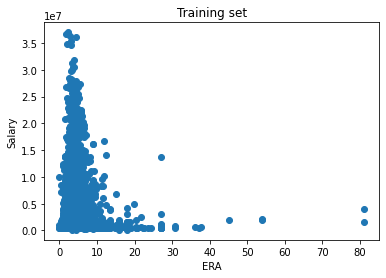

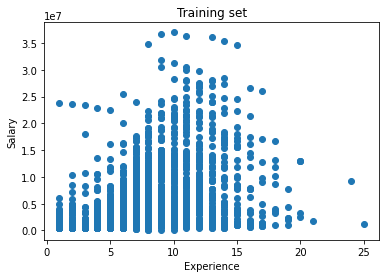

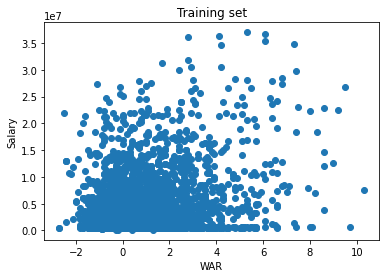

In [96]:
# Visualizations

# plt.scatter(bucket, result) 
# plt.title("For sus")
# plt.xlabel("Bucket")
# plt.ylabel("Result")
# plt.show()

# ERA vs Salary
plt.scatter(ERA_trainV, Salary_trainV) 
plt.title("Training set")
plt.xlabel("ERA")
plt.ylabel("Salary")
plt.show()

#Experience vs Salary 
plt.scatter(Experience_trainV, Salary_trainV) 
plt.title("Training set")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

# WAR vs Salary 
plt.scatter(WAR_trainV, Salary_trainV) 
plt.title("Training set")
plt.xlabel("WAR")
plt.ylabel("Salary")
plt.show()

In [97]:
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

c:\users\huynh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\huynh\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\users\huynh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\huynh\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


[-1.    0.01  1.  ]


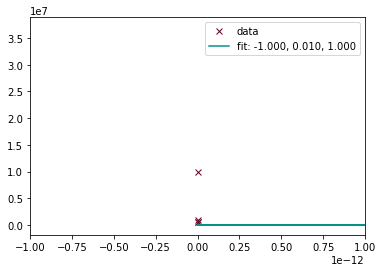

c:\users\huynh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


[-1.89400673e+07 -7.03520820e-02  1.64354195e+07]


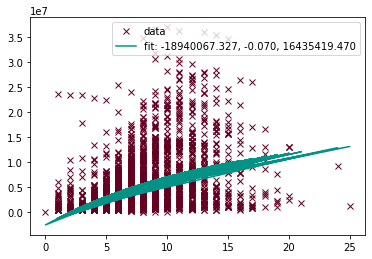

[ 3.52690084e+06  1.72394485e-01 -3.54495023e+05]


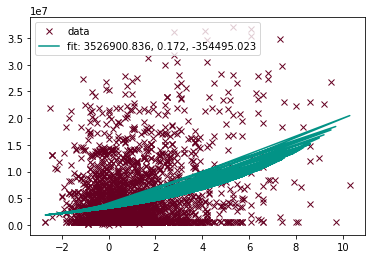

array([2322214.79281562, 3359610.52200673, 3172405.81324212, ...,
       3052874.65525227, 3764357.33853455, 3693959.15193365])

In [98]:
# Checking if trainData contains any NaN or inf value
# print(np.isnan(WAR_train).any()) - True
# print(np.isnan(Salary_train).any()) - True
# print(np.isnan(ERA_train).any()) - False
# print(np.isnan(Experience_train).any()) - True

# print(np.isinf(WAR_train).any()) - False
# print(np.isinf(Salary_train).any()) - False
# print(np.isinf(ERA_train).any()) - True
# print(np.isinf(Experience_train).any()) - False

# Replacing NaN entries with 0
WAR_train = np.nan_to_num(WAR_train)
Salary_train = np.nan_to_num(Salary_train)
ERA_train = np.nan_to_num(ERA_train)
Experience_train = np.nan_to_num(Experience_train)

# Testing curve fit (exponential regression)
exponential_regression(ERA_train, Salary_train)
exponential_regression(Experience_train, Salary_train)
exponential_regression(WAR_train, Salary_train)



In [99]:
# WAR vs Salary seems like the most suitable for linear regression (or possibly exponential)
trainData = []
for i in range(len(WAR_train)):
  trainData.append([WAR_train[i], Salary_train[i]])
trainData = np.asarray(trainData)
print(trainData)

[[-1.6000000e+00  2.5475000e+06]
 [ 3.0000000e-01  5.6554500e+05]
 [ 0.0000000e+00  1.0775925e+07]
 ...
 [-2.0000000e-01  4.6660600e+05]
 [ 9.0000000e-01  2.1526710e+07]
 [ 8.0000000e-01  1.0646990e+06]]


In [100]:
#hyperparamters
learning_rate = 0.0001 #this is alpha in my slide 
initial_b = 0 #this is initial theta_0 
initial_w = 0 #this is initial theta_1
num_iterations = 20 #the number of iterations to adjust

In [101]:
#input: b, w, and loaded traning set (i.e., instances)
#output: return the average of squared error (i.e., cost / (2 * number of instances) as we showed in class)
def compute_cost(b, w, instances):
    # Your code starts here
    #   Please add comments or text cells in between to explain the general idea of each block of the code.
    #   Please feel free to add more cells below this cell if necessary
    numInstances = len(instances)
    i = 0
    sumTotal = 0
    while(i < numInstances):
        squaredError = ((instances[:,0][i]*w + b) - (instances[:,1][i]))**2 # (hyp(x) - y)^2  
        #print(b,w,instances[:,0][i],instances[:,1][i] )
        sumTotal += squaredError 
        i+=1
    return sumTotal / (2 * numInstances)

In [102]:
#input: current b, current w, instances, learning_rate
#output: return updated b and w
def step_gradient(b_current, w_current, instances, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(instances))

    #Calculate Gradient
    for i in range(0, len(instances)):
        x = instances[i, 0]
        y = instances[i, 1]
        w_gradient += (1/N) * x * ((w_current*x + b_current) - y)
        b_gradient += (1/N) * 1 * ((w_current*x + b_current) - y)
    
    #Update current w and b
    w_updated = w_current - learning_rate * w_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, w_updated


In [103]:
#input: instance, current b, current w, learning rate, and number of iterations
#output: return final b, final w and costs (i.e., a list storing cost in each iteration)

def gradient_descent_runner(instances, current_b, current_w, learning_rate, num_iterations):
    b = current_b
    w = current_w
    cost_list = [] #store cost in each iteration
    
    # Your code starts here
    #   Please add comments or text cells in between to explain the general idea of each block of the code.
    #   Please feel free to add more cells below this cell if necessary
    for i in range(num_iterations):
        cost_list.append(compute_cost(b, w, instances))
        b,w = step_gradient(b, w, instances, learning_rate)
    
    return [b, w, cost_list]

In [104]:
b, w, cost_list = gradient_descent_runner(trainData, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, w, trainData))

Optimized b: 7746.262015672424
Optimized w: 10741.045525162128
Minimized cost: 21092202832712.508


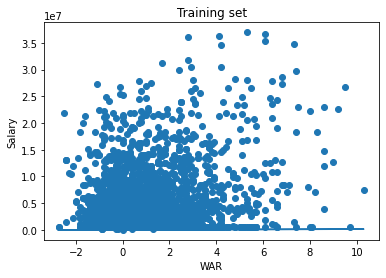

In [105]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

plt.scatter(trainData[:,0], trainData[:,1])
plt.plot(trainData[:,0], w*trainData[:,0]+b)
plt.title("Training set")
plt.xlabel("WAR")
plt.ylabel("Salary")
plt.show()





TypeError: only integer scalar arrays can be converted to a scalar index

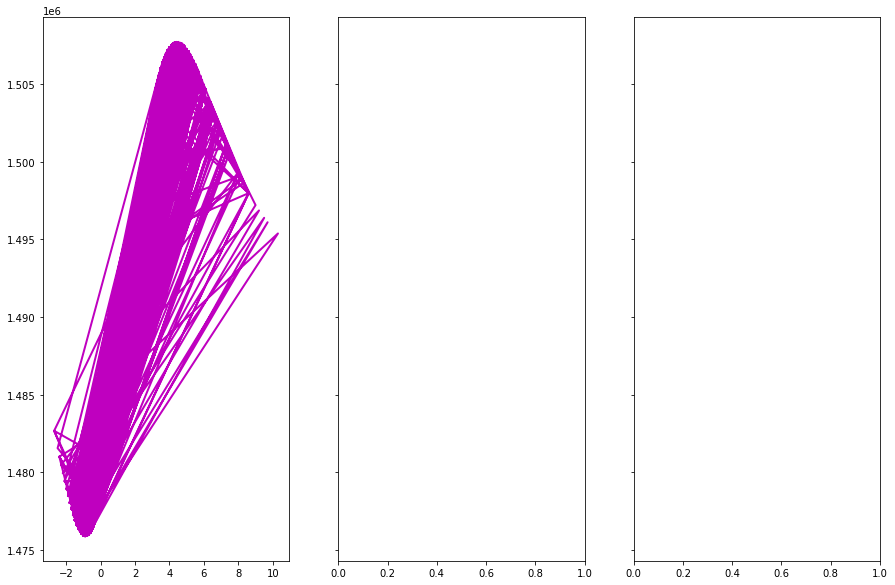

In [107]:
# #############################################################################
# Generate sample data
X = [[i] for i in WAR_train]
y = Salary_train
# print(y)
# print(Salary_train)

# #############################################################################
# Add noise to targets
#y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()